In [1]:
import pandas as pd
import numpy as np
import sys
import os
from pandasql import sqldf

In [2]:
bookings_path = "/home/dsc/data/challenge/bookings.csv.bz2"
searches_path = "/home/dsc/data/challenge/searches.csv.bz2"

pd.set_option('display.max_columns', None)

### Paso 1
comprobar que pinta tienen los datos

In [3]:
dfb = pd.read_csv(bookings_path, 
                     compression = "bz2", 
                     sep = "^", 
                     memory_map = True, 
                     error_bad_lines = False,
                     nrows = 1000)
dfs = pd.read_csv(searches_path, 
                     compression = "bz2", 
                     sep = "^", 
                     memory_map = True, 
                     error_bad_lines = False,
                     nrows = 1000)

In [4]:
dfb.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [5]:
dfb.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [6]:
dfs.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [7]:
dfs.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

### Hallamos una cota superior

contamos todas las reservas y todas las búsquedas, el ratio es la cota superior de este problema

In [8]:
chunksize = 1000000 #10⁶
reader = pd.read_csv(bookings_path, 
                     compression = "bz2", 
                     sep = "^", 
                     memory_map = True, 
                     error_bad_lines = False,
                     usecols=["dep_port", "arr_port","pax", "cre_date           ", "brd_time           "],
                     chunksize=chunksize)    

count = 0
for chunk in reader:      
    curr = chunk[chunk["pax"]>0]
    count += len(curr.index)    

In [9]:
#si todas las reservas (que no son cancelaciones) proviniesen de las búsquedas el ratio seria:
bookings = count
busquedas = 20390198

ratio = bookings / busquedas
ratio

0.33391867994611923

### Limpiar los datos
1. Ver si hay duplicados

In [10]:
def drop_duplicates_df(origin, destination):
    chunksize = 100000 #10⁵
    clean_df = pd.DataFrame()
    
    reader = pd.read_csv(origin, 
                     compression = "bz2", 
                     sep = "^", 
                     chunksize=chunksize,
                     low_memory = True,
                     dtype = str
                     )
    
    for idx, chunk in enumerate(reader):       
        chunk = chunk.apply(lambda x: x.str.strip())    
        clean_df = clean_df.append(chunk)
        clean_df.drop_duplicates(inplace = True)
        sys.stdout.write(f"\rChunk: {str(idx)} clean_df: {str(clean_df.shape[0])}")
        sys.stdout.flush()
    
    clean_df.rename(columns=lambda x: x.strip(), inplace=True)
    
    if os.path.exists(destination):
      os.remove(destination)
    clean_df.to_csv(destination, header=True, mode='a', index=False)
    del clean_df
    print("")

In [11]:
bookings_clean_path = "/home/dsc/data/challenge/bookings_clean.csv"
searches_clean_path = "/home/dsc/data/challenge/searches_clean.csv"

In [12]:
%%time
#1000003
drop_duplicates_df(bookings_path, bookings_clean_path)

Chunk: 100 clean_df: 1000003
CPU times: user 11min 28s, sys: 44.4 s, total: 12min 12s
Wall time: 12min 13s


In [13]:
%%time
# 359004
drop_duplicates_df(searches_path, searches_clean_path)

Chunk: 203 clean_df: 359004
CPU times: user 10min 27s, sys: 32.4 s, total: 11min
Wall time: 11min


### Suposiciones:
 
#### Primera aproximación
Una búsqueda se ha convertido en reserva sí:
 
 * El origen y destino de la búsqueda se corresponden con el origen (Origin) y destino (Destination) de la reserva
 * La fecha del vuelo de la reserva es la misma que la de la búsqueda (Seg1Date)

In [14]:
%%time
#cruzamos searches con bookings limpio
destination = "/home/dsc/data/challenge/searches_e_booking1.csv"

df_bookings = pd.read_csv(
    bookings_clean_path, 
    memory_map = True, 
    error_bad_lines = False,
    usecols = ["dep_port", "arr_port", "brd_time"]
)

df_searches = pd.read_csv(
    searches_clean_path, 
    memory_map = True, 
    low_memory = False,
    usecols = ["Origin", "Destination", "Seg1Date"])    

#clean up the data
df_searches = df_searches[df_searches["Origin"].str.len() == 3]
df_searches = df_searches[df_searches["Destination"].str.len() == 3]
df_searches['Seg1Date'] = pd.to_datetime(df_searches['Seg1Date'])      
df_searches['Seg1Date'] = df_searches['Seg1Date'].dt.date

df_bookings = df_bookings[df_bookings["dep_port"].str.len() == 3]
df_bookings = df_bookings[df_bookings["arr_port"].str.len() == 3]
df_bookings["brd_time"] = pd.to_datetime(df_bookings["brd_time"])
df_bookings["brd_date"] = df_bookings["brd_time"].dt.date
df_bookings = df_bookings.drop(["brd_time"], axis=1)
df_bookings = df_bookings.drop_duplicates()

merged = pd.merge(df_searches, df_bookings, how="left", 
                  left_on=["Origin", "Destination", "Seg1Date"],
                  right_on=["dep_port", "arr_port", "brd_date"])
merged["produced_booking"] = merged["dep_port"].notnull().astype(int)
merged = merged.drop(columns=["dep_port", "arr_port", "brd_date"])
    
if os.path.exists(destination):
  os.remove(destination)
merged.to_csv(destination, header=True, mode='a', index=False)

CPU times: user 4.6 s, sys: 155 ms, total: 4.75 s
Wall time: 4.76 s


### Suposiciones:
 
#### Segunda aproximación 
Una búsqueda se ha convertido en reserva sí:
 
Búsquedas de sólo ida (RoundTrip == 0)
 * El origen y destino de la búsqueda se corresponden con el origen (Origin) y destino (Destination) de la reserva
 * La fecha del vuelo de la reserva es la misma que la de la búsqueda (Seg1Date)
 

Búsquedas de ida y vuelta 
(RoundTrip == 1)
 * además tiene que encontrarse una reserva para el viaje de vuelta en la fecha indicada en la búsqueda. Esto se comprueba si dep_port == last_port

In [15]:
%%time
#cruzamos searches con bookings limpio
destination = "/home/dsc/data/challenge/searches_e_booking2.csv"

df_bookings = pd.read_csv(
    bookings_clean_path, 
    memory_map = True, 
    error_bad_lines = False,
    usecols = ["dep_port", "arr_port", "brd_time", "lst_port"],
    dtype = str
)

df_searches = pd.read_csv(
    searches_clean_path, 
    memory_map = True, 
    low_memory = False,
    usecols = ["Origin", "Destination", "Seg1Date", "RoundTrip"],
    dtype = str
)

#clean up the data
df_searches = df_searches[df_searches["Origin"].str.len() == 3]
df_searches = df_searches[df_searches["Destination"].str.len() == 3]
df_searches['Seg1Date'] = pd.to_datetime(df_searches['Seg1Date'])      
df_searches['Seg1Date'] = df_searches['Seg1Date'].dt.date

df_bookings = df_bookings[df_bookings["dep_port"].str.len() == 3]
df_bookings = df_bookings[df_bookings["arr_port"].str.len() == 3]
df_bookings = df_bookings[df_bookings["lst_port"].str.len() == 3]
df_bookings["brd_time"] = pd.to_datetime(df_bookings["brd_time"])
df_bookings["brd_date"] = df_bookings["brd_time"].dt.date
df_bookings = df_bookings.drop(["brd_time"], axis=1)

#generate round_trip in bookings
df_bookings["round_trip"] = (df_bookings["dep_port"] == df_bookings["lst_port"]).astype(int).astype(str)
df_bookings = df_bookings.drop("lst_port", axis = 1)
df_bookings = df_bookings.drop_duplicates()

merged = pd.merge(df_searches, df_bookings, how="left", 
                  left_on=["Origin", "Destination", "Seg1Date", "RoundTrip"],
                  right_on=["dep_port", "arr_port", "brd_date", "round_trip"])

merged["produced_booking"] = merged["dep_port"].notnull().astype(int)
merged = merged.drop(columns=["dep_port", "arr_port", "brd_date", "round_trip"])

if os.path.exists(destination):
  os.remove(destination)
merged.to_csv(destination, header=True, mode='a', index=False)

CPU times: user 6.23 s, sys: 254 ms, total: 6.48 s
Wall time: 6.48 s


### Suposiciones:
 
#### Tercera aproximación 
Una búsqueda se ha convertido en reserva sí:
 
Búsquedas de sólo ida (RoundTrip == 0)
 * El origen y destino de la búsqueda se corresponden con el origen (Origin) y destino (Destination) de la reserva
 * La fecha del vuelo de la reserva es la misma que la de la búsqueda (Seg1Date)
 * La fecha de la búsqueda (Date) es previa a la fecha de la reserva (cre_date)
 

Búsquedas de ida y vuelta 
(RoundTrip == 1)
 * además tiene que encontrarse una reserva para el viaje de vuelta en la fecha indicada en la búsqueda. Esto se comprueba si dep_port == last_port

In [16]:
#Para quitar las fechas mal formateadas en el paso de abajo comprobe lo siguiente
#w = df_bookings["cre_date"].str.contains(r'(\d+-\d+-\d+),\d+:\d+:\d+')
#2013-03-25,00:00:00 1
#x = df_bookings["cre_date"].str.contains(r'(\d+-\d+-\d+) \d+:\d+:\d+')
#2013-03-25 00:00:00 1M
#df_bookings[~(w|x)]
#2013-04-24 1

In [17]:
%%time
#cruzamos searches con bookings limpio
destination = "/home/dsc/data/challenge/searches_e_booking3.csv"

df_bookings = pd.read_csv(
    bookings_clean_path, 
    memory_map = True, 
    error_bad_lines = False,
    usecols = ["dep_port", "arr_port", "brd_time", "lst_port", "cre_date"],
    dtype = str
)

df_searches = pd.read_csv(
    searches_clean_path, 
    memory_map = True, 
    low_memory = False,
    usecols = ["Origin", "Destination", "Seg1Date", "RoundTrip", "Date"],
    dtype = str
)

#clean up the data
df_searches = df_searches[df_searches["Origin"].str.len() == 3]
df_searches = df_searches[df_searches["Destination"].str.len() == 3]
df_searches['Seg1Date'] = pd.to_datetime(df_searches['Seg1Date'])      
df_searches['Seg1Date'] = df_searches['Seg1Date'].dt.date
df_searches['Date'] = pd.to_datetime(df_searches['Date'])      
df_searches['Date'] = df_searches['Date'].dt.date

df_bookings = df_bookings[df_bookings["dep_port"].str.len() == 3]
df_bookings = df_bookings[df_bookings["arr_port"].str.len() == 3]
df_bookings = df_bookings[df_bookings["lst_port"].str.len() == 3]
df_bookings["brd_time"] = pd.to_datetime(df_bookings["brd_time"])
df_bookings["brd_date"] = df_bookings["brd_time"].dt.date
df_bookings = df_bookings.drop(["brd_time"], axis=1)
#quitar las fechas mal formateadas
df_bookings = df_bookings[df_bookings["cre_date"].str.contains(r'\d+-\d+-\d+ \d+:\d+:\d+')]
df_bookings["cre_date"] = pd.to_datetime(df_bookings["cre_date"], format="%Y-%m-%d %H:%M:%S")
df_bookings["cre_date"] = df_bookings["cre_date"].dt.date

#generate round_trip in bookings
df_bookings["round_trip"] = (df_bookings["dep_port"] == df_bookings["lst_port"]).astype(int).astype(str)
df_bookings = df_bookings.drop("lst_port", axis = 1)

CPU times: user 6.28 s, sys: 285 ms, total: 6.56 s
Wall time: 6.56 s


In [18]:
df_bookings = df_bookings.groupby(["dep_port", "arr_port", "brd_date", "round_trip"]).min()
df_bookings.reset_index()

merged = sqldf("""
select 
    s.Origin, 
    s.Destination, 
    s.Seg1Date, 
    s.RoundTrip, 
    s.Date,    
    case 
        when b.round_trip is not null and s.Date <= cre_date then 1
        else 0
    end as produced_booking
    from df_searches s left join df_bookings b
    on s.Origin = b.dep_port 
    and s.Destination = b.arr_port 
    and s.Seg1Date = b.brd_date 
    and s.RoundTrip = b.round_trip
    and s.Date <= cre_date
""")

if os.path.exists(destination):
  os.remove(destination)
merged.to_csv(destination, header=True, mode='a', index=False)

In [19]:
# comprobamos que el join tenga el mismo tamaño que el df original
df_searches.shape[0] == merged.shape[0]

True

In [20]:
aproximacion1 = "/home/dsc/data/challenge/searches_e_booking1.csv"
aproximacion2 = "/home/dsc/data/challenge/searches_e_booking2.csv"
aproximacion3 = "/home/dsc/data/challenge/searches_e_booking3.csv"

df_a1 = pd.read_csv(
    aproximacion1,     
    dtype = str
)

df_a2 = pd.read_csv(
    aproximacion2,     
    dtype = str
)

df_a3 = pd.read_csv(
    aproximacion3,     
    dtype = str
)

tam = [df_a1.shape[0], df_a2.shape[0], df_a3.shape[0]]
eib = [df_a1[df_a1["produced_booking"] == "1"].shape[0],
       df_a2[df_a2["produced_booking"] == "1"].shape[0],
       df_a3[df_a3["produced_booking"] == "1"].shape[0]
      ]
metodos = ["Aproximación 1", "Aproximación 2", "Aproximación 3"]

data = pd.DataFrame({"Method": metodos, "Size":tam, "Ended_in_booking":eib})

<AxesSubplot:xlabel='Method', ylabel='Ended_in_booking'>

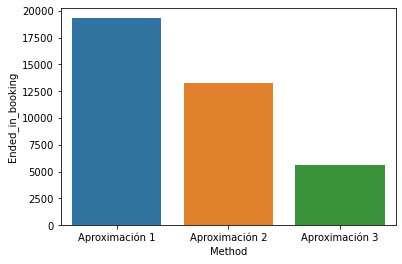

In [21]:
import seaborn as sns
sns.barplot(data=data, x="Method", y="Ended_in_booking")

### Conclusiones

el número de búsquedas que terminaron en reserva depende enormemente de las asun